In [1]:
# Import Modules
from legged_gym import LEGGED_GYM_ROOT_DIR
import os
import sys
import isaacgym
from legged_gym.envs import *
from legged_gym.utils import get_args, export_policy_as_jit, task_registry, Logger
import numpy as np
import torch

Importing module 'gym_38' (/home/willw/isaacgym/isaacgym/python/isaacgym/_bindings/linux-x86_64/gym_38.so)
Setting GYM_USD_PLUG_INFO_PATH to /home/willw/isaacgym/isaacgym/python/isaacgym/_bindings/linux-x86_64/usd/plugInfo.json
PyTorch version 2.0.1+cu117
Device count 2
/home/willw/isaacgym/isaacgym/python/isaacgym/_bindings/src/gymtorch


Using /home/willw/.cache/torch_extensions/py38_cu117 as PyTorch extensions root...
Emitting ninja build file /home/willw/.cache/torch_extensions/py38_cu117/gymtorch/build.ninja...
Building extension module gymtorch...
Allowing ninja to set a default number of workers... (overridable by setting the environment variable MAX_JOBS=N)


ninja: no work to do.


Loading extension module gymtorch...


Warp 0.10.1 initialized:
   CUDA Toolkit: 11.5, Driver: 12.2
   Devices:
     "cpu"    | x86_64
     "cuda:0" | NVIDIA GeForce RTX 3090 (sm_86)
     "cuda:1" | NVIDIA GeForce RTX 3090 (sm_86)
   Kernel cache: /home/willw/.cache/warp/0.10.1


In [2]:
device = "cuda:0"
# sys.argv = sys.argv[0:1]+["--task=wk4_vis"]
# sys.argv = sys.argv[0:1]+["--task=gr1t2_leg"]
sys.argv = sys.argv[0:1]+["--task=HuV3_leg"]
sys.argv.append(f"--sim_device={device}")
sys.argv.append(f"--rl_device={device}")
# sys.argv.append("--headless")
sys.argc = len(sys.argv)
args = get_args()

In [3]:
env_cfg, train_cfg = task_registry.get_cfgs(name=args.task)
env_cfg.env.num_envs = min(env_cfg.env.num_envs, 16)
# env_cfg.env.num_history_frames = 10

# env_cfg.terrain.terrain_proportions = [0.0, 0.0, 0.1, 0.6, 0.2, 0., 0., 0.]
env_cfg.terrain.heightfield_range = [0., 0.]
train_cfg.runner.resume = True
train_cfg.runner.load_run = "241108_170534_properPD_flat"
train_cfg.runner.checkopints = -1
env_cfg.terrain.curriculum = False
env_cfg.terrain.mesh_type = 'plane'
env_cfg.terrain.terrain_proportions = [0., 0.3, 0, 0.4, 0.3]
env_cfg.terrain.num_rows = 4
env_cfg.terrain.num_cols = 4 
env_cfg.noise.add_noise = False
env_cfg.domain_rand.randomize_friction = False
env_cfg.domain_rand.randomize_base_mass = False
env_cfg.domain_rand.randomize_motor_strength = False
env_cfg.domain_rand.randomize_Kp_factor = False
env_cfg.domain_rand.randomize_Kd_factor = False
env_cfg.domain_rand.push_robots = False
env_cfg.domain_rand.randomize_lag_timesteps = False
env_cfg.domain_rand.randomize_init_state = False

In [4]:
env, _ = task_registry.make_env(name=args.task, args=args, env_cfg=env_cfg)
for i in range(3):
    _ = env.reset()

Setting seed: 1731122748.5227249
Not connected to PVD
+++ Using GPU PhysX
Physics Engine: PhysX
Physics Device: cuda:0
GPU Pipeline: enabled
self.num_dof: 28 	self.num_dofs: 28
body_names: ['pelvis_link', 'left_hip_yaw_link', 'left_hip_roll_link', 'left_hip_pitch_link', 'left_knee_link', 'left_ankle_link', 'left_toe_link', 'right_hip_yaw_link', 'right_hip_roll_link', 'right_hip_pitch_link', 'right_knee_link', 'right_ankle_link', 'right_toe_link', 'torso_link', 'left_shoulder_pitch_link', 'left_shoulder_roll_link', 'left_shoulder_yaw_link', 'left_elbow_pitch_link', 'left_elbow_roll_link', 'left_wrist_pitch_link', 'left_wrist_yaw_link', 'right_shoulder_pitch_link', 'right_shoulder_roll_link', 'right_shoulder_yaw_link', 'right_elbow_pitch_link', 'right_elbow_roll_link', 'right_wrist_pitch_link', 'right_wrist_yaw_link', 'zneck_link']
dof_names: ['left_hip_yaw_joint', 'left_hip_roll_joint', 'left_hip_pitch_joint', 'left_knee_joint', 'left_ankle_joint', 'left_toe_joint', 'right_hip_yaw_joint

/home/willw/anaconda3/envs/isaac/lib/python3.8/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


reward_names: ['ang_Vel', 'bHgt', 'bRot', 'bTwist', 'cotr', 'eFrc', 'eVel', 'jVel', 'lin_Vel', 'smth']


In [5]:
ppo_runner, train_cfg = task_registry.make_alg_runner(env=env, name=args.task, args=args, train_cfg=train_cfg)
policy = ppo_runner.alg.actor_critic

'train_cfg' provided -> Ignoring 'name=HuV3_leg'
{'activation': 'elu', 'actor_hidden_dims': [512, 256, 128], 'critic_hidden_dims': [1024, 512, 128], 'encoder_hidden_dims': [1024, 256, 64], 'estimation_dims': {'vel': 3, 'implicit': 16}, 'init_noise_std': 1.0, 'latent_dims': 19, 'rnn_hidden_size': 512, 'rnn_num_layers': 1, 'rnn_type': 'gru', 'token_channels': 64} <class 'dict'>
AsymActorCritic.__init__ got unexpected args, ignoring: ['num_heightmap_obs', 'vision_in_channels', 'latent_dims', 'rnn_hidden_size', 'rnn_num_layers', 'rnn_type', 'token_channels']
[AsymAC] Actor MLP: Sequential(
  (0): Linear(in_features=68, out_features=512, bias=True)
  (1): ELU(alpha=1.0)
  (2): Linear(in_features=512, out_features=256, bias=True)
  (3): ELU(alpha=1.0)
  (4): Linear(in_features=256, out_features=128, bias=True)
  (5): ELU(alpha=1.0)
  (6): Linear(in_features=128, out_features=12, bias=True)
)
[AsymAC] Critic MLP: Sequential(
  (0): Linear(in_features=152, out_features=1024, bias=True)
  (1): 

In [12]:
_ = env.reset()
env.commands[:,3] = 0.0
obs_tuple = env.get_observations()
obs, obs_history, depth_image = obs_tuple[:3]
# heightmap = obs_tuple[-1]["heightmap"]
obs_np = np.zeros((int(env.max_episode_length), env_cfg.env.num_envs ,env.num_obs))

In [13]:
len(obs_tuple)

3

In [15]:
for i in range(1*int(env.max_episode_length)):
    env.cmd_w[:,0] = 0.8
    env.cmd_w[:,1] = 0.0
    env.commands[:,3] = 0.0
    env.commands[:,1] = 0.0
    env.commands[:,0] = 1.2
    actions = policy(obs.detach(), obs_history.detach())
    obs_tuple, rewards, dones, infos = env.step(actions)
    obs, privileged_obs, obs_history, est_nominal, obs_future = obs_tuple
    # actions = policy(obs.detach(), obs_history.detach(), heightmap.detach())
    # obs, privileged_obs, obs_history, depth_image, est_nominal, obs_future = obs_tuple
    # heightmap = est_nominal["heightmap"]
    # depth_image = torch.zeros((env.num_envs, 2, 60, 106), device=env.device)
    print(obs[:,6:9], env.root_states[:,2].data, "\n")
    obs_np[i] = obs.cpu().detach().numpy()
ppo_runner.alg.actor_critic.reset(dones)

tensor([[2.4000, 0.0000, 0.0137],
        [2.4000, 0.0000, 0.0129],
        [2.4000, 0.0000, 0.0124],
        [2.4000, 0.0000, 0.0174],
        [2.4000, 0.0000, 0.0137],
        [2.4000, 0.0000, 0.0164],
        [2.4000, 0.0000, 0.0178],
        [2.4000, 0.0000, 0.0103],
        [2.4000, 0.0000, 0.0120],
        [2.4000, 0.0000, 0.0130],
        [2.4000, 0.0000, 0.0139],
        [2.4000, 0.0000, 0.0144],
        [2.4000, 0.0000, 0.0112],
        [2.4000, 0.0000, 0.0132],
        [2.4000, 0.0000, 0.0098],
        [2.4000, 0.0000, 0.0163]], device='cuda:0', grad_fn=<SliceBackward0>) tensor([0.8256, 0.8253, 0.8265, 0.8253, 0.8257, 0.8252, 0.8253, 0.8264, 0.8254,
        0.8252, 0.8252, 0.8251, 0.8265, 0.8253, 0.8268, 0.8251],
       device='cuda:0') 

tensor([[2.4000, 0.0000, 0.0137],
        [2.4000, 0.0000, 0.0129],
        [2.4000, 0.0000, 0.0125],
        [2.4000, 0.0000, 0.0173],
        [2.4000, 0.0000, 0.0137],
        [2.4000, 0.0000, 0.0164],
        [2.4000, 0.0000, 0.0177],
   

In [9]:
 print(torch.norm(env.rb_states[:, env.feet_indices, 7:10], dim=-1))

print(torch.norm(env.contact_forces[:, env.feet_indices, :], dim=-1))

tensor([[0.0123, 0.7243],
        [0.0293, 1.2753],
        [0.1043, 0.3184],
        [0.0151, 1.3719],
        [0.5187, 0.0804],
        [0.2600, 0.0444],
        [0.3309, 0.0429],
        [0.0537, 0.0207],
        [0.0323, 0.1765],
        [0.0598, 0.0937],
        [0.0337, 0.9365],
        [0.6781, 0.0111],
        [0.0273, 0.1046],
        [0.3143, 0.0087],
        [1.0030, 0.0718],
        [0.0137, 1.2950]], device='cuda:0')
tensor([[ 194.2593,   63.8107],
        [ 526.1530,    0.0000],
        [ 575.3697,  119.1524],
        [ 387.9960,    0.0000],
        [ 256.9076,  136.8839],
        [ 181.9710,  177.9657],
        [  37.5121,  272.0233],
        [ 111.9321,  550.1931],
        [ 497.3211,  209.5127],
        [ 251.4641,  237.3548],
        [ 503.0400,    0.0000],
        [1347.9943,  249.1405],
        [ 177.2937,  323.5548],
        [  86.2332,  524.7155],
        [ 370.2137,    0.0000],
        [ 368.2159,    0.0000]], device='cuda:0')


In [10]:
from legged_gym.utils.math import quat_apply, wrap_to_pi
forward = quat_apply(env.base_quat, env.forward_vec)
heading = torch.atan2(forward[:, 1], forward[:, 0])
ang_vel_targ = torch.clip(wrap_to_pi((env.commands[:, 3] - heading) * env.cfg.commands.tracking_strength),
                          -env.cfg.commands.ranges.ang_vel_yaw[0], env.cfg.commands.ranges.ang_vel_yaw[1])
print(env.commands[:, 3], heading, ang_vel_targ)
print(env.commands[:, 3] - heading)
print((env.commands[:, 3] - heading) * env.cfg.commands.tracking_strength)
print(wrap_to_pi((env.commands[:, 3] - heading) * env.cfg.commands.tracking_strength))
print(env.cfg.commands.ranges.ang_vel_yaw[0])
print(env.cfg.commands.ranges.ang_vel_yaw[1])

tensor([ 1.1359,  1.2254,  0.5509, -0.6319, -0.3069, -1.4404,  1.3726,  0.9815,
         1.0368,  0.0086, -0.9721, -0.8000,  1.2422, -0.5778,  0.1608, -0.0063],
       device='cuda:0') tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       device='cuda:0') tensor([0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
        0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000],
       device='cuda:0')
tensor([ 1.1359,  1.2254,  0.5509, -0.6319, -0.3069, -1.4404,  1.3726,  0.9815,
         1.0368,  0.0086, -0.9721, -0.8000,  1.2422, -0.5778,  0.1608, -0.0063],
       device='cuda:0')
tensor([ 0.2272,  0.2451,  0.1102, -0.1264, -0.0614, -0.2881,  0.2745,  0.1963,
         0.2074,  0.0017, -0.1944, -0.1600,  0.2484, -0.1156,  0.0322, -0.0013],
       device='cuda:0')
tensor([ 0.2272,  0.2451,  0.1102, -0.1264, -0.0614, -0.2881,  0.2745,  0.1963,
         0.2074,  0.0017, -0.1944, -0.1600,  0.2484, -0.1156,  0.0322, -0.0013],
       device='cud

In [11]:
env.dof_vel.min(dim=-1)

torch.return_types.min(
values=tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       device='cuda:0'),
indices=tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0'))

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
# %matplotlib auto

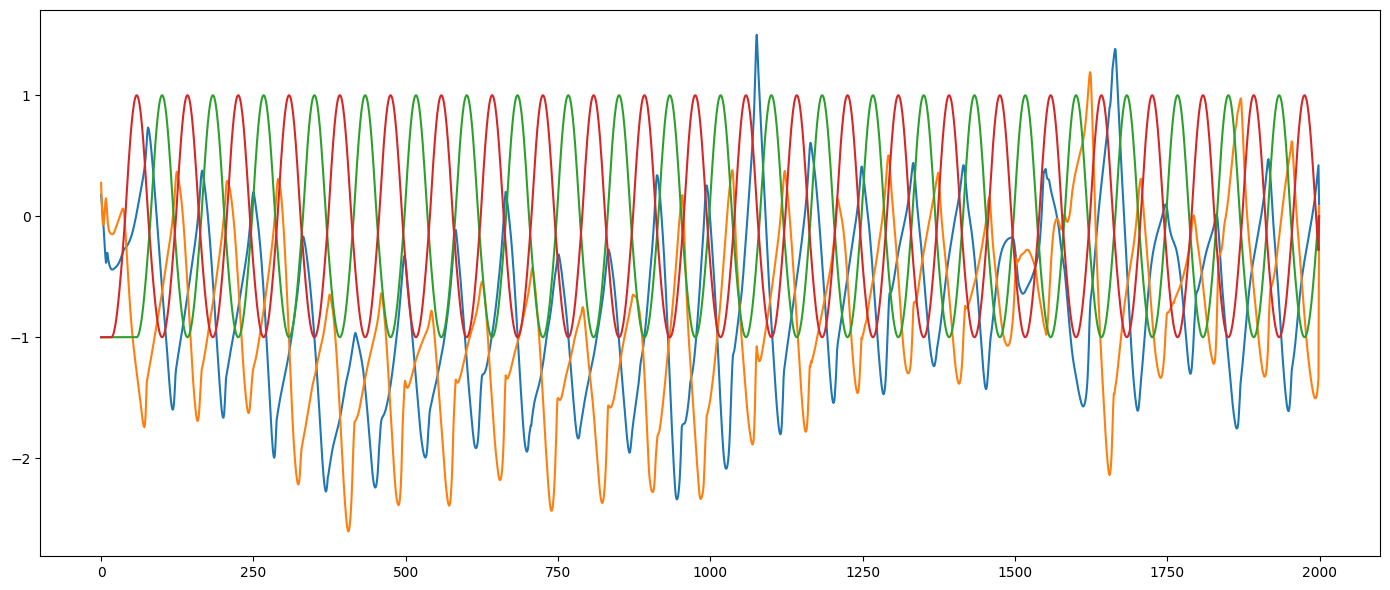

In [13]:

fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot()
ax.plot(obs_np[:,0,11])
ax.plot(obs_np[:,0,17])
ax.plot(obs_np[:,0,45])
ax.plot(obs_np[:,0,47])
fig.tight_layout()
plt.show()

IndexError: index 1 is out of bounds for dimension 1 with size 1

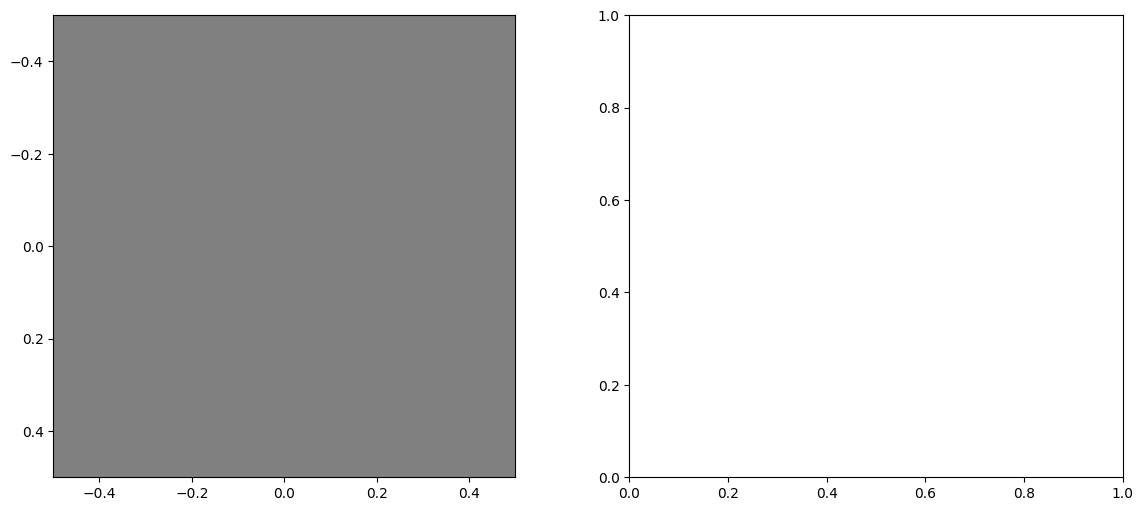

In [14]:
for robot_to_check in range(12,16):
    fig, axs = plt.subplots(1,2, figsize=(14,6))
    img = axs[0].imshow(depth_image[robot_to_check,0].cpu(), cmap="gray", vmin=-0.5, vmax=0.5)
    axs[1].imshow(depth_image[robot_to_check,1].cpu(), cmap="gray", vmin=-0.5, vmax=0.5)
    fig.colorbar(img)
    axs[1].set_title(robot_to_check)
    fig.tight_layout()
    plt.show()

In [ ]:
return_tuple = policy.ce_net(obs_history.detach(), heightmap.detach())
for i in return_tuple[1]:
    print(type(i))
    print(i.shape)

In [ ]:
idx = 2
return_tuple = policy.ce_net(obs_history.detach(), heightmap.detach())

In [ ]:
fig = plt.figure()
xx, yy = np.meshgrid(np.arange(18), np.arange(11))

for idx in range(4):
    hm_nom = est_nominal['heightmap'][idx].cpu().detach().numpy().reshape(18,11).T
    hm_est = return_tuple[1][1][idx].cpu().detach().numpy().reshape(18,11).T
    ax_max = fig.add_subplot(221+idx, projection='3d')

    ax_max.scatter(xx, yy, hm_nom, label = "nom")
    ax_max.scatter(xx, yy, hm_est, label = "est")
    ax_max.set_title(f"heightmap_{idx}")
    zlim = ax_max.get_zlim()
    if zlim[1]-zlim[0] < 0.5:
        print(idx, zlim)
        ax_max = ax_max.set_zlim([zlim[0]-0.5, zlim[1]+0.5])
ax_max.legend()
fig.tight_layout()
plt.show()

In [ ]:
for i in range(10*int(env.max_episode_length)):
    actions = policy(obs.detach(), obs_history.detach(), depth_image.detach())
    obs_tuple, rewards, dones, infos = env.step(actions)
    env.cmd_w[:,:3] = 0
    obs, privileged_obs, obs_history, depth_image, est_nominal, obs_future = obs_tuple

In [ ]:
x = np.arange(0,10000)
y = 0.998**x
z = np.exp(-x*1e-3)
plt.plot(x,y,label="idx")
plt.plot(x,z,label="exp")
plt.grid("on")
plt.legend()
plt.show()

print(np.sum(y>1e-2))
print(np.sum(y>1e-3))
print(np.sum(y>1e-4))